In [15]:
import numpy as np
import pandas as pd
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("../../..")
from utils import utils, postprocessing_utils as post
from analysis import stats

In [2]:
experiment = "acl-score-limit"
results_path = "../../../results/"

# PoS

In [3]:
task = "pos"
metric = "Accuracy"

### mBERT

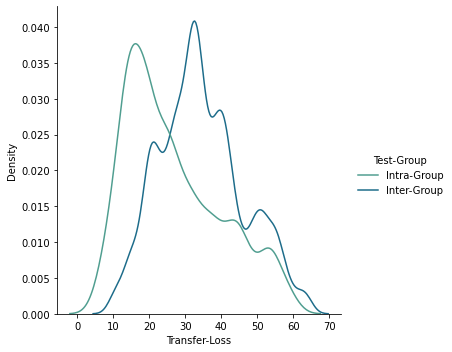

Levene (p-value): 0.14511427373795474
Normality intra-group (p-value): 0.05207417050496321
Normality inter-group (p-value): 0.03740664072960718
ANOVA condition not met, switching to Kruskal-Wallis
KruskalResult(statistic=20.831415558456797, pvalue=5.015351285691258e-06)


In [4]:
short_model_name = "mbert"
stats.analysis_of_variance.one_way(task, short_model_name, metric, experiment, results_path, show_distribution=True)

### XLM

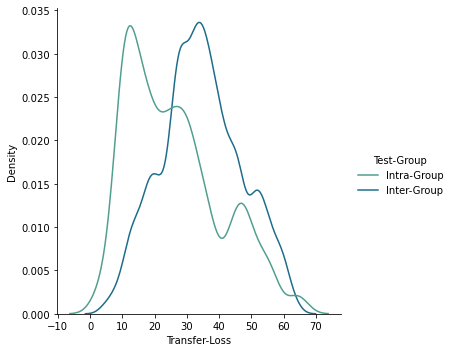

Levene (p-value): 0.12263871485442336
Normality intra-group (p-value): 0.07203783298639269
Normality inter-group (p-value): 0.10450273191793044
ANOVA condition not met, switching to Kruskal-Wallis
KruskalResult(statistic=20.860428668533018, pvalue=4.939952643707151e-06)


In [5]:
short_model_name = "xlm-roberta"
stats.analysis_of_variance.one_way(task, short_model_name, metric, experiment, results_path, show_distribution=True)

# Sentiment

In [6]:
task = "sentiment"
metric = "Macro_F1"

### mBERT

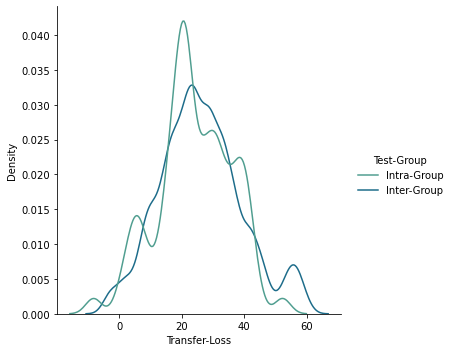

Levene (p-value): 0.39847190049011816
Normality intra-group (p-value): 0.7553236595875745
Normality inter-group (p-value): 0.12382243477349696
ANOVA condition not met, switching to Kruskal-Wallis
KruskalResult(statistic=0.8717849044378454, pvalue=0.35046164517938905)


In [7]:
short_model_name = "mbert"
stats.analysis_of_variance.one_way(task, short_model_name, metric, experiment, results_path, show_distribution=True)

### XLM

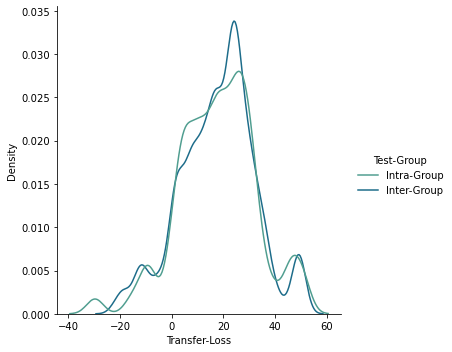

Levene (p-value): 0.7973707508996429
Normality intra-group (p-value): 0.30950453009121426
Normality inter-group (p-value): 0.3413205279294712
ANOVA condition not met, switching to Kruskal-Wallis
KruskalResult(statistic=0.0027372853903671057, pvalue=0.9582744561427782)


In [8]:
short_model_name = "xlm-roberta"
stats.analysis_of_variance.one_way(task, short_model_name, metric, experiment, results_path, show_distribution=True)

# Model comparison

### PoS

In [13]:
final1 = stats.analysis_of_variance.prepare_table("pos", "mbert", "Accuracy", experiment, results_path)
final1["Model"] = "mBERT"
final2 = stats.analysis_of_variance.prepare_table("pos", "xlm-roberta", "Accuracy", experiment, results_path)
final2["Model"] = "XLM"
final = pd.concat([final1, final2])
G1 = final.loc[final["Model"] == "mBERT", "Transfer-Loss"].values
G2 = final.loc[final["Model"] == "XLM", "Transfer-Loss"].values

In [16]:
scipy.stats.levene(G1, G2)

LeveneResult(statistic=1.9617836183784367, pvalue=0.1618311579739621)

In [17]:
print("mBERT:", scipy.stats.normaltest(G1))
print("XLM:", scipy.stats.normaltest(G2))

mBERT: NormaltestResult(statistic=10.66880747797239, pvalue=0.004822784893735648)
XLM: NormaltestResult(statistic=11.313676604397024, pvalue=0.0034935449887905498)


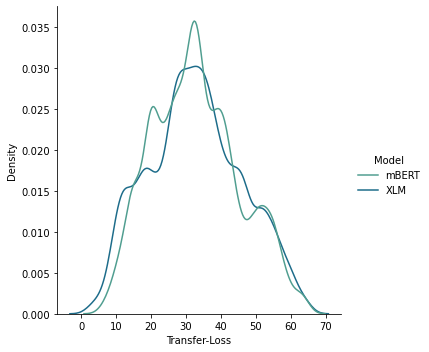

In [18]:
sns.displot(x="Transfer-Loss", data=final, kind="kde", hue="Model", bw_adjust=0.5, palette="crest", common_norm=False)

In [20]:
scipy.stats.f_oneway(G1, G2)

F_onewayResult(statistic=0.02734859493361455, pvalue=0.8687043240564063)

### Sentiment

In [22]:
final1 = stats.analysis_of_variance.prepare_table("sentiment", "mbert", "Macro_F1", experiment, results_path)
final1["Model"] = "mBERT"
final2 = stats.analysis_of_variance.prepare_table("sentiment", "xlm-roberta", "Macro_F1", experiment, results_path)
final2["Model"] = "XLM"
final = pd.concat([final1, final2])
G1 = final.loc[final["Model"] == "mBERT", "Transfer-Loss"].values
G2 = final.loc[final["Model"] == "XLM", "Transfer-Loss"].values

In [24]:
scipy.stats.levene(G1, G2)

LeveneResult(statistic=4.303749443862837, pvalue=0.03840296719205319)

In [25]:
scipy.stats.kruskal(G1, G2)

KruskalResult(statistic=45.973404506271436, pvalue=1.198692804381734e-11)

# Two-way ANOVA

### PoS

In [52]:
final1 = prepare_table("pos", "mbert", "Accuracy")
final1["Model"] = "mBERT"
G1 = final1.loc[final1["Test-Group"] == "Intra-Group", "Transfer-Loss"].values
G2 = final1.loc[final1["Test-Group"] == "Inter-Group", "Transfer-Loss"].values

final2 = prepare_table("pos", "xlm-roberta", "Accuracy")
final2["Model"] = "XLM"
G3 = final2.loc[final2["Test-Group"] == "Intra-Group", "Transfer-Loss"].values
G4 = final2.loc[final2["Test-Group"] == "Inter-Group", "Transfer-Loss"].values

final = pd.concat([final1, final2])
final = final.rename(columns={"Transfer-Loss": "TL", "Test-Group": "Type"})

e:\anaconda\envs\tfm_ccil\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [53]:
stats.levene(G1, G2, G3, G4)

LeveneResult(statistic=0.07676361824561674, pvalue=0.9725323972860205)

In [54]:
print("Intra mBERT:", stats.normaltest(G1))
print("Inter mBERT:", stats.normaltest(G2))
print("Intra XLM:", stats.normaltest(G3))
print("Inter XLM:", stats.normaltest(G4))

Intra mBERT: NormaltestResult(statistic=7.982537208638812, pvalue=0.018476260182607576)
Inter mBERT: NormaltestResult(statistic=8.090359436178705, pvalue=0.01750655812788086)
Intra XLM: NormaltestResult(statistic=18.894171679525755, pvalue=7.891921372766459e-05)
Inter XLM: NormaltestResult(statistic=20.494827007343453, pvalue=3.5449071268761684e-05)


In [ ]:
formula = "TL ~ C(Type) + C(Model) + C(Type):C(Model)"
model = ols(formula, final).fit()
aov_table = anova_lm(model, typ=2)

In [46]:
print(aov_table)

                         sum_sq     df           F        PR(>F)
C(Type)              978.158876    1.0    5.519445  1.909136e-02
C(Model)           21174.422285    1.0  119.480657  9.841311e-26
C(Type):C(Model)       2.939217    1.0    0.016585  8.975674e-01
Residual          120509.942495  680.0         NaN           NaN


### Sentiment

In [57]:
final1 = prepare_table("sentiment", "mbert", "Macro_F1")
final1["Model"] = "mBERT"
G1 = final1.loc[final1["Test-Group"] == "Intra-Group", "Transfer-Loss"].values
G2 = final1.loc[final1["Test-Group"] == "Inter-Group", "Transfer-Loss"].values

final2 = prepare_table("sentiment", "xlm-roberta", "Macro_F1")
final2["Model"] = "XLM"
G3 = final2.loc[final2["Test-Group"] == "Intra-Group", "Transfer-Loss"].values
G4 = final2.loc[final2["Test-Group"] == "Inter-Group", "Transfer-Loss"].values

final = pd.concat([final1, final2])
final = final.rename(columns={"Transfer-Loss": "TL", "Test-Group": "Type"})

e:\anaconda\envs\tfm_ccil\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
e:\anaconda\envs\tfm_ccil\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [58]:
stats.levene(G1, G2, G3, G4)

LeveneResult(statistic=3.962571985845256, pvalue=0.00812451997805647)